In [224]:
%load_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
%autoreload
import xes
import utils
[utils.without(
    trace,
    ["events"]
) for trace in
    xes.xes_to_dataframes("data/sample.xes", keys=None, load_traces=1)
]


[{'concept:name': '21', 'creator': 'Fluxicon Disco'}]

In [51]:
path = "data\Activities of daily living of several individuals_1_all\data\edited_hh102_labour.xes\edited_hh102_labour.xes"
edited_hh102_labour = xes.xes_to_dataframes(path, keys=None, load_traces="all")
len(edited_hh102_labour)

18

In [52]:
# event list of first trace
edited_hh102_labour[0]["events"]

,concept:name,lifecycle:transition,time:timestamp,Column_4
0,Start,start,2011-06-15 00:06:32+02:00,Start
1,Start,complete,2011-06-15 00:06:32+02:00,Start
2,sleep,start,2011-06-15 00:06:32+02:00,sleep
3,sleep,complete,2011-06-15 03:38:29+02:00,sleep
4,toilet,start,2011-06-15 03:38:44+02:00,toilet
...,...,...,...,...
77,personalhygiene,complete,2011-06-15 23:19:40+02:00,personalhygiene
78,sleep,start,2011-06-15 23:20:09+02:00,sleep
79,sleep,complete,2011-06-16 07:00:40+02:00,sleep
80,End,start,2011-06-16 07:00:40+02:00,End


In [34]:
# unique events
print("concept:name")
print(edited_hh102_labour[0]["events"]["concept:name"].unique())
print("lifecycle:transition")
print(edited_hh102_labour[0]["events"]["lifecycle:transition"].unique())

concept:name
['Start' 'sleep' 'toilet' 'dress' 'mealpreperation' 'eatingdrinking'
 'cleaning' 'relax' 'personalhygiene' 'work' 'bathe' 'groom' 'read'
 'snack' 'watchtv' 'outdoors' 'End']
lifecycle:transition
['start' 'complete']


In [29]:
for trace in edited_hh102_labour:
    print(utils.without(trace, "events"))

{'concept:name': '11', 'creator': 'Fluxicon Disco'}
{'concept:name': '21', 'creator': 'Fluxicon Disco'}
{'concept:name': '31', 'creator': 'Fluxicon Disco'}
{'concept:name': '61', 'creator': 'Fluxicon Disco'}
{'concept:name': '71', 'creator': 'Fluxicon Disco'}
{'concept:name': '81', 'creator': 'Fluxicon Disco'}
{'concept:name': '91', 'creator': 'Fluxicon Disco'}
{'concept:name': '101', 'creator': 'Fluxicon Disco'}
{'concept:name': '131', 'creator': 'Fluxicon Disco'}
{'concept:name': '141', 'creator': 'Fluxicon Disco'}
{'concept:name': '151', 'creator': 'Fluxicon Disco'}
{'concept:name': '161', 'creator': 'Fluxicon Disco'}
{'concept:name': '171', 'creator': 'Fluxicon Disco'}
{'concept:name': '201', 'creator': 'Fluxicon Disco'}
{'concept:name': '211', 'creator': 'Fluxicon Disco'}
{'concept:name': '221', 'creator': 'Fluxicon Disco'}
{'concept:name': '231', 'creator': 'Fluxicon Disco'}
{'concept:name': '241', 'creator': 'Fluxicon Disco'}


In [187]:
# Only first trace
# df = edited_hh102_labour[0]["events"]
# All traces merged
df = pd.concat([trace["events"] for trace in edited_hh102_labour]).reset_index(drop=True)
df

,concept:name,lifecycle:transition,time:timestamp,Column_4
0,Start,start,2011-06-15 00:06:32+02:00,Start
1,Start,complete,2011-06-15 00:06:32+02:00,Start
2,sleep,start,2011-06-15 00:06:32+02:00,sleep
3,sleep,complete,2011-06-15 03:38:29+02:00,sleep
4,toilet,start,2011-06-15 03:38:44+02:00,toilet
...,...,...,...,...
1147,personalhygiene,complete,2011-07-08 22:14:25+02:00,personalhygiene
1148,sleep,start,2011-07-08 22:14:54+02:00,sleep
1149,sleep,complete,2011-07-09 06:55:29+02:00,sleep
1150,End,start,2011-07-09 06:55:29+02:00,End


In [69]:
df[(df["concept:name"] == "sleep") & (df["lifecycle:transition"] == "complete")].iloc[0]

concept:name                                sleep
lifecycle:transition                     complete
time:timestamp          2011-06-15 03:38:29+02:00
Column_4                                    sleep
Name: 3, dtype: object

In [188]:
l = []
for index, row in df[df["lifecycle:transition"] == "start"].iterrows():
    concept_name = row["concept:name"]
    start_time = row["time:timestamp"]

    partial_df = df[index:]
    complete_event = partial_df[(partial_df["concept:name"] == concept_name) & (partial_df["lifecycle:transition"] == "complete")].iloc[0]

    end_time = complete_event["time:timestamp"]

    l.append({"concept:name": concept_name, "start_time": start_time, "end_time": end_time, "duration": end_time - start_time})

event_durations = pd.DataFrame(l)
event_durations

,concept:name,start_time,end_time,duration
0,Start,2011-06-15 00:06:32+02:00,2011-06-15 00:06:32+02:00,0 days 00:00:00
1,sleep,2011-06-15 00:06:32+02:00,2011-06-15 03:38:29+02:00,0 days 03:31:57
2,toilet,2011-06-15 03:38:44+02:00,2011-06-15 03:41:22+02:00,0 days 00:02:38
3,sleep,2011-06-15 03:41:31+02:00,2011-06-15 08:46:23+02:00,0 days 05:04:52
4,toilet,2011-06-15 08:46:36+02:00,2011-06-15 08:49:39+02:00,0 days 00:03:03
...,...,...,...,...
571,read,2011-07-08 20:43:06+02:00,2011-07-08 21:08:47+02:00,0 days 00:25:41
572,relax,2011-07-08 21:17:50+02:00,2011-07-08 21:32:34+02:00,0 days 00:14:44
573,personalhygiene,2011-07-08 21:34:59+02:00,2011-07-08 22:14:25+02:00,0 days 00:39:26
574,sleep,2011-07-08 22:14:54+02:00,2011-07-09 06:55:29+02:00,0 days 08:40:35


In [189]:
# Average event length
# event_durations.groupby(['concept:name']).agg({"start_time": "mean", "end_time": ["mean", "count"]})
event_durations.groupby(['concept:name']).agg(
    mean_start_time=("start_time", "mean"),
    mean_end_time=("end_time", "mean"),
    mean_duration=("duration", "mean"),
    count=("duration", "count")
)
# event_durations.groupby(['concept:name']).agg(["mean", "count"])

,mean_start_time,mean_end_time,mean_duration,count
concept:name,,,,
End,2011-06-28 00:31:24.944444416+02:00,2011-06-28 00:31:24.944444416+02:00,0 days 00:00:00,18
Start,2011-06-27 00:05:08.611111168+02:00,2011-06-27 00:05:08.611111168+02:00,0 days 00:00:00,18
bathe,2011-06-24 02:05:49.666666752+02:00,2011-06-24 02:20:06.333333248+02:00,0 days 00:14:16.666666666,6
cleaning,2011-06-25 07:34:10.652173824+02:00,2011-06-25 07:38:54.652174080+02:00,0 days 00:04:44,23
dress,2011-06-28 08:25:00.909091072+02:00,2011-06-28 08:29:22.272727296+02:00,0 days 00:04:21.363636363,11
eatingdrinking,2011-06-26 17:49:05.466666752+02:00,2011-06-26 18:07:11.633333504+02:00,0 days 00:18:06.166666666,30
groom,2011-06-30 17:04:17.058823424+02:00,2011-06-30 17:14:20.117647104+02:00,0 days 00:10:03.058823529,17
mealpreperation,2011-06-25 18:49:05.235294208+02:00,2011-06-25 19:02:11.470588160+02:00,0 days 00:13:06.235294117,34
medication,2011-06-26 09:26:14+02:00,2011-06-26 09:30:40.333333248+02:00,0 days 00:04:26.333333333,3


In [207]:
sleep_durations = event_durations[event_durations["concept:name"] == "sleep"]["duration"].to_numpy(dtype="timedelta64[s]").astype(float) / 3600.0
sleep_durations

array([3.5325    , 5.08111111, 0.90444444, 7.67527778, 0.91138889,
       1.00555556, 6.72027778, 3.73083333, 1.38027778, 8.74222222,
       4.6925    , 3.99972222, 1.33944444, 2.63611111, 5.98444444,
       5.17416667, 0.69777778, 5.76861111, 3.77277778, 3.61111111,
       1.30527778, 9.42888889, 5.58361111, 3.60805556, 1.75666667,
       2.69027778, 5.26916667, 3.7       , 1.20361111, 4.45805556,
       3.05611111, 2.50944444, 1.35222222, 0.85222222, 4.67388889,
       2.93722222, 1.56861111, 1.66944444, 5.34055556, 5.00333333,
       0.44888889, 1.79972222, 8.42138889, 1.7325    , 3.68722222,
       3.42472222, 8.98333333, 3.77277778, 5.66527778, 3.5325    ,
       1.03055556, 0.53166667, 1.74444444, 5.29361111, 2.97083333,
       1.34305556, 6.47722222, 3.85361111, 0.64555556, 8.67638889])

(array([13.,  8.,  6., 12.,  3.,  9.,  3.,  0.,  2.,  4.]),
 array([0.44888889, 1.34688889, 2.24488889, 3.14288889, 4.04088889,
        4.93888889, 5.83688889, 6.73488889, 7.63288889, 8.53088889,
        9.42888889]),
 <BarContainer object of 10 artists>)

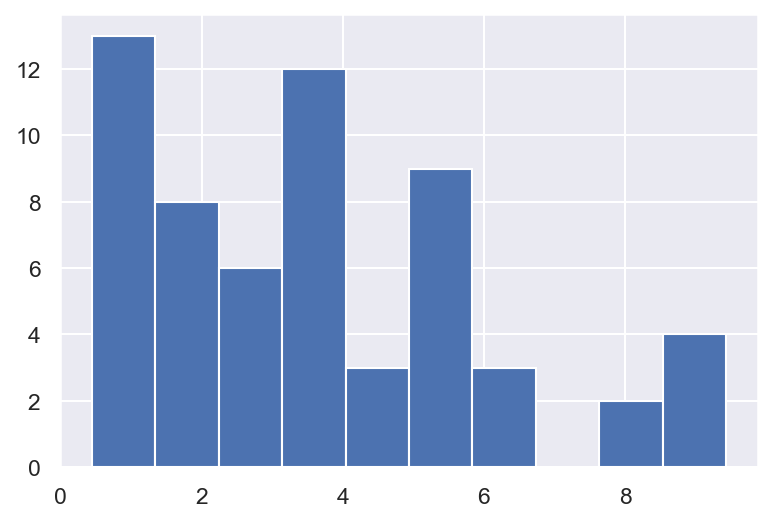

In [226]:
plt.hist(sleep_durations)

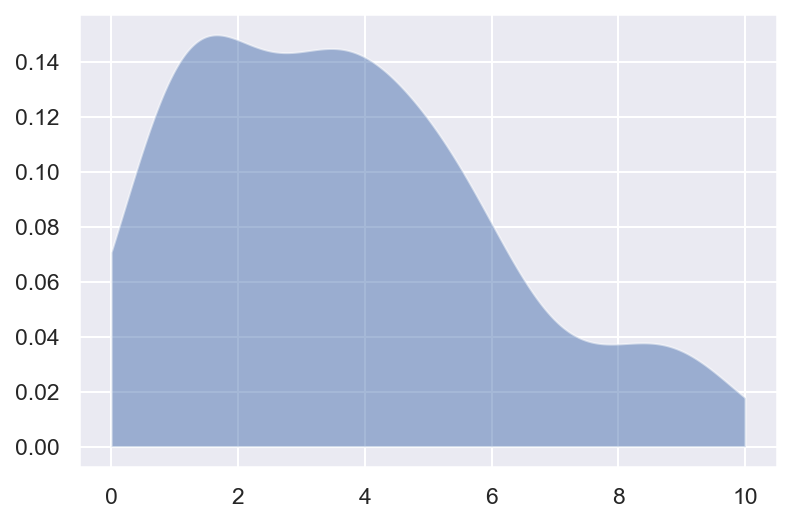

In [229]:
from sklearn.neighbors import KernelDensity

sleep_duration_kde = KernelDensity(bandwidth=1.0, kernel="gaussian")
sleep_duration_kde.fit(sleep_durations[:, None])

# timedelta_range = pd.timedelta_range(0, periods=11, freq="H").to_numpy(dtype="timedelta64[s]").astype('float') / 3600.0
# timedelta_range
# array([    0,  3600,  7200, 10800, 14400, 18000, 21600, 25200, 28800, 32400, 36000], dtype='timedelta64[s]')

timedelta_range = np.linspace(0, 10, 1000)

probs = sleep_duration_kde.score_samples(timedelta_range[:, None])
# np.exp(probs)
plt.fill_between(timedelta_range, np.exp(probs), alpha=0.5);

In [238]:
sleep_duration_kde.sample(10)

array([[5.07337874],
       [3.07812825],
       [4.98566574],
       [8.75619303],
       [4.62237975],
       [4.35740122],
       [5.29477349],
       [5.33105042],
       [9.30097401],
       [9.05556183]])

In [244]:
sleep_start_time = event_durations[event_durations["concept:name"] == "sleep"]["start_time"]
sleep_start_time = sleep_start_time.dt.hour + sleep_start_time.dt.minute / 60 + sleep_start_time.dt.second / 3600
sleep_start_time
# .to_numpy(dtype="timedelta64[s]").astype(float) / 3600.0

1       0.108889
3       3.691944
6       8.904167
39     23.335833
43      7.117500
56     13.749167
75     21.868611
79      4.648333
81      8.498056
109    22.814444
112     0.016667
114     4.787222
116     8.904444
125    15.139167
137    21.807222
141     3.839167
143     9.110556
161    21.308333
165     3.136111
167     7.028611
178    15.548056
192    22.582222
215    21.481111
219     3.107222
221     6.786667
233    14.173889
243    21.426389
247     4.400000
249     8.190556
278    22.223611
282     2.751667
284     5.874722
286     8.480000
302    14.280833
315    22.307500
319     3.041111
321     6.049444
323     7.742222
351    21.297778
355     2.684444
357     7.791389
381    21.775833
383    23.636389
387     8.197500
412     3.349167
414     7.155278
440    21.982500
444     7.068333
478    22.953611
482     4.673889
484     8.293333
502    15.287222
504    16.066667
515    22.300000
519     3.656389
521     6.688056
547    22.125000
551     4.663056
553     8.6044

(array([ 2., 13.,  7., 13.,  0.,  2.,  5.,  0.,  0., 18.]),
 array([1.66666667e-02, 2.37863889e+00, 4.74061111e+00, 7.10258333e+00,
        9.46455556e+00, 1.18265278e+01, 1.41885000e+01, 1.65504722e+01,
        1.89124444e+01, 2.12744167e+01, 2.36363889e+01]),
 <BarContainer object of 10 artists>)

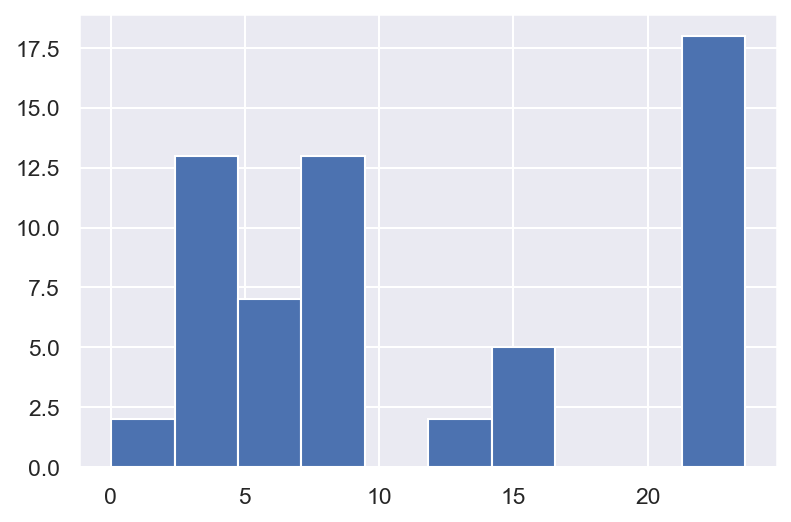

In [245]:
plt.hist(sleep_start_time)

In [ ]:
sleep_start_time_kde = KernelDensity(bandwidth=1.0, kernel="gaussian")
sleep_start_time_kde.fit(sleep_start_time[:, None])

the_range = np.linspace(0, 24, 1000)

probs = sleep_start_time_kde.score_samples(the_range[:, None])
# np.exp(probs)
plt.fill_between(the_range, np.exp(probs), alpha=0.5);

In [273]:
N = 10
sample_sleep_start_time = sleep_start_time_kde.sample(N).reshape(-1)
sample_sleep_start_time = pd.date_range(start="2024-01-01", periods=N, freq="D") + pd.to_timedelta(sample_sleep_start_time, unit='h')
sample_sleep_start_time

DatetimeIndex(['2024-01-01 02:41:04.667427600',
               '2024-01-02 04:53:40.669663200',
                  '2024-01-03 05:58:47.109558',
               '2024-01-04 10:40:31.596956400',
               '2024-01-05 21:22:02.599467600',
               '2024-01-07 00:23:50.382643200',
               '2024-01-07 01:34:26.266774800',
               '2024-01-08 06:49:35.571025200',
                  '2024-01-09 04:06:49.125744',
               '2024-01-10 07:48:54.601354800'],
              dtype='datetime64[ns]', freq=None)

In [275]:
sample_sleep_duration = pd.to_timedelta(sleep_duration_kde.sample(N).reshape(-1), unit='h')
sample_sleep_duration

TimedeltaIndex(['0 days 08:32:19.493001600', '0 days 03:09:27.455767200',
                '0 days 03:30:53.303104800', '0 days 05:38:10.917927600',
                   '0 days 01:27:12.270816', '0 days 06:11:24.786110400',
                '0 days 02:45:00.673160400', '0 days 01:58:43.099888800',
                   '0 days 05:37:29.479566', '0 days 00:35:51.307627200'],
               dtype='timedelta64[ns]', freq=None)

In [278]:
# "start" events
sample_start_events = pd.DataFrame({
    "time:timestamp": sample_sleep_start_time,
    "lifecycle:transition": ["start" for i in range(N)],
    "concept:name": ["sleep" for i in range(N)]
})

# "complete" events = start + duration
sample_complete_events = pd.DataFrame({
    "time:timestamp": sample_sleep_start_time + sample_sleep_duration,
    "lifecycle:transition": ["complete" for i in range(N)],
    "concept:name": ["sleep" for i in range(N)]
})

pd.concat([sample_start_events, sample_complete_events]).sort_values("time:timestamp").reset_index(drop=True)

,time:timestamp,lifecycle:transition,concept:name
0,2024-01-01 02:41:04.667427600,start,sleep
1,2024-01-01 11:13:24.160429200,complete,sleep
2,2024-01-02 04:53:40.669663200,start,sleep
3,2024-01-02 08:03:08.125430400,complete,sleep
4,2024-01-03 05:58:47.109558000,start,sleep
5,2024-01-03 09:29:40.412662800,complete,sleep
6,2024-01-04 10:40:31.596956400,start,sleep
7,2024-01-04 16:18:42.514884000,complete,sleep
8,2024-01-05 21:22:02.599467600,start,sleep
9,2024-01-05 22:49:14.870283600,complete,sleep
